In [ ]:
import tweepy
import csv
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


'''
from google.collab import files
uploaded = files.upload


login = pd.read_csv("Twit_cred.csv")
print(login.head())

API = login['Key'][0]
API_token = login['Key'][1]
Bearer_token = login['Key'][2]
'''

'\nfrom google.collab import files\nuploaded = files.upload\n\n\nlogin = pd.read_csv("Twit_cred.csv")\nprint(login.head())\n\nAPI = login[\'Key\'][0]\nAPI_token = login[\'Key\'][1]\nBearer_token = login[\'Key\'][2]\n'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Twit_cred.csv to Twit_cred.csv


In [ ]:
#Get the data
log = pd.read_csv('Twit_cred.csv')
API = log['Key'][0]
API_token = log['Key'][1]
Access_token = log['Key'][2]
Access_token_secret = log['Key'][3]

In [ ]:
API

'9L5nxcOx4R4mcsVVjC8aK1wxg'

In [ ]:
#Create authentication object
authenticate = tweepy.OAuthHandler(API, API_token)

#Set access token and access token secret
authenticate.set_access_token(Access_token, Access_token_secret)

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
#Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "VirginUnite", count = 100, lang = "en", tweet_mode = "extended")

#Print the last 5 tweets from this account
print("Show the 5 recent tweets: \n")
i = 1

for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i+= 1

Show the 5 recent tweets: 

1) Transitioning to renewable energy will improve farmers’ yields, increase profitability, and enable expansion to new markets. @RockyMtnInst explain how resilient, distributed energy can support job creation and economic diversification across the Caribbean: https://t.co/e836Zhz7LL

2) The Caribbean has a chance to lead the world in becoming the first region to protect 30% of its ocean and inspire others to take up the challenge. 

Read @richardbranson's blog about protecting the ocean in the Caribbean https://t.co/CGQ2Y7t2Wn https://t.co/JF0TWyWHUK

3) San Francisco based filmmaker and friend of Virgin Unite, Akshaya Sawant, is winning hearts &amp; awards with her new film 'Talking To The Wind'. Akshaya was a recipient of the Virgin Unite Social Impact Film Fund in 2017/2018. https://t.co/puyEMthFQK

4) Read how @Bec_Hubbard, programme director at @Our_Fish, is working to turn the ocean from victim to climate solution: https://t.co/To7W27iOSt @oceanunite #

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets']) 
#Show the 1st 5 rows of Data
df.head()

,Tweets
0,Transitioning to renewable energy will improve...
1,The Caribbean has a chance to lead the world i...
2,San Francisco based filmmaker and friend of Vi...
3,"Read how @Bec_Hubbard, programme director at @..."
4,Selina from @Virgin shares her experiences of ...


In [ ]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
    text = re.sub(r'#', '', text) #Removed hashtags
    text = re.sub(r'RT[\s]+', '', text) #Removed RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Removed URLs

    return text

df['Tweets'] = df['Tweets'].apply(clean_text)
df

,Tweets
0,Transitioning to renewable energy will improve...
1,The Caribbean has a chance to lead the world i...
2,San Francisco based filmmaker and friend of Vi...
3,"Read how _Hubbard, programme director at _Fish..."
4,Selina from shares her experiences of being a...
...,...
95,"""Put simply, the ocean is approaching breaking..."
96,How can the 4dayweek benefit everyone? 100% H...
97,": Anne Mäusbacher, author of the book Kids for..."
98,: What are the biggest changes you expect to s...


In [ ]:
#Calculate Subjectivity and Polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Creating 2 more columns with this respect

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df


,Tweets,Subjectivity,Polarity
0,Transitioning to renewable energy will improve...,0.327273,0.168182
1,The Caribbean has a chance to lead the world i...,0.591667,0.350000
2,San Francisco based filmmaker and friend of Vi...,0.423737,0.223232
3,"Read how _Hubbard, programme director at _Fish...",0.050000,-0.075000
4,Selina from shares her experiences of being a...,1.000000,0.500000
...,...,...,...
95,"""Put simply, the ocean is approaching breaking...",0.451429,0.030000
96,How can the 4dayweek benefit everyone? 100% H...,0.000000,0.000000
97,": Anne Mäusbacher, author of the book Kids for...",0.000000,0.000000
98,: What are the biggest changes you expect to s...,0.226515,0.045455


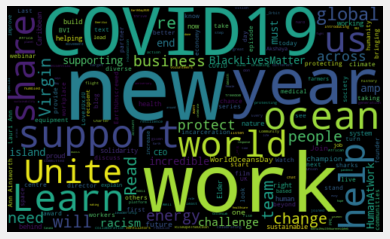

In [ ]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = None, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Finding the negative, neutral and positive analysis

def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Transitioning to renewable energy will improve...,0.327273,0.168182,Positive
1,The Caribbean has a chance to lead the world i...,0.591667,0.350000,Positive
2,San Francisco based filmmaker and friend of Vi...,0.423737,0.223232,Positive
3,"Read how _Hubbard, programme director at _Fish...",0.050000,-0.075000,Negative
4,Selina from shares her experiences of being a...,1.000000,0.500000,Positive
...,...,...,...,...
95,"""Put simply, the ocean is approaching breaking...",0.451429,0.030000,Positive
96,How can the 4dayweek benefit everyone? 100% H...,0.000000,0.000000,Neutral
97,": Anne Mäusbacher, author of the book Kids for...",0.000000,0.000000,Neutral
98,: What are the biggest changes you expect to s...,0.226515,0.045455,Positive


In [ ]:
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
j=1
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j+=1

1) Read how _Hubbard, programme director at _Fish, is working to turn the ocean from victim to climate solution:   RiseUp4TheOcean 

2) Over the last 15 years, increases in pretrial detention account for 99% of all jail growth. 

If we want to end mass incarceration, reforming the bail system can prevent incarceration before it starts:  

3) . share why the climate movement must unite behind the BlackLivesMatter movement:  

4) . is humbled to partner with _org as they work to end mass incarceration, excessive punishment and racialinjustice:  BlackLivesMatter 

5) If you’re feeling anxious, worried, lonely or stressed – text Shout85258 for support. 

Trained volunteers will be there to provide a confidential text chat anytime, anywhere, whatever the difficulty:   

6) This WorldOceansDay the  are asking you to commit to taking one small step towards the same goal – helping to rebuild nature:  

7) RiseUp4TheOcean. Read _sack’s article about why we must respect the power of nature, list

In [ ]:
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
j=1
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j+=1

1) Transitioning to renewable energy will improve farmers’ yields, increase profitability, and enable expansion to new markets.  explain how resilient, distributed energy can support job creation and economic diversification across the Caribbean: 

2) The Caribbean has a chance to lead the world in becoming the first region to protect 30% of its ocean and inspire others to take up the challenge. 

Read 's blog about protecting the ocean in the Caribbean  

3) San Francisco based filmmaker and friend of Virgin Unite, Akshaya Sawant, is winning hearts &amp; awards with her new film 'Talking To The Wind'. Akshaya was a recipient of the Virgin Unite Social Impact Film Fund in 2017/2018. 

4) Selina from  shares her experiences of being an LGBTQ+ person in the workplace and why she’s glad to work for a business that shares her values  BeingOutStayingIn VirginFamily 

5)  reached out to political activist and human rights defender Jacqueline Gomes-Neves to discuss systemic racism in the UK. 

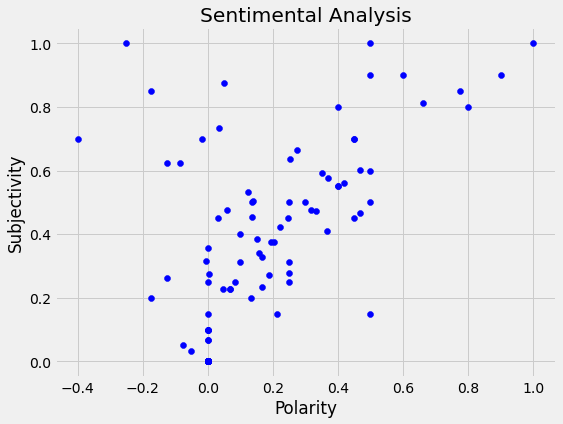

In [ ]:
#Plotting the Subjectivity and Polarity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Check the percentage of positive tweets

tweeps = df[df.Analysis == 'Positive']
tweeps = tweeps['Tweets']

round( (tweeps.shape[0] / df.shape[0]) * 100, 1)

58.0

In [ ]:
#Check the percentage of negative tweets

tweens = df[df.Analysis == 'Negative']
tweens = tweens['Tweets']

round( (tweens.shape[0] / df.shape[0]) * 100, 1)


11.0

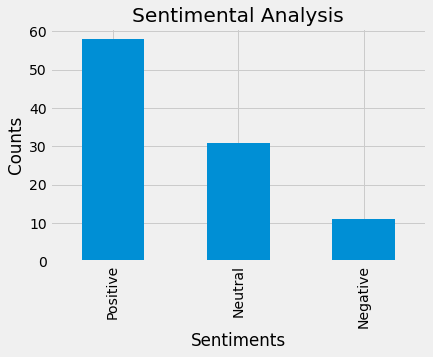

In [ ]:
vc = df['Analysis'].value_counts()

#Plot and visualise the value counts
plt.title('Sentimental Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
vc.plot(kind = 'bar')
plt.show()